# Revisiting the risk

[The risk we saw last time has two components - systematic risk and unsystematic risk.](https://www.nseindia.com/products-services/indices-beta)


### Systematic risks:
These are risks associated with the economic, political, sociological and other macro-level changes. They affect the entire market as a whole and cannot be controlled or eliminated merely by diversifying one's portfolio.

### Unsystematic risks:
These are risks that are unique to a firm or industry. Factors such as management capability, consumer preferences, labour, etc. contribute to unsystematic risks. Unsystematic risks are controllable by nature and can be considerably reduced by sufficiently diversifying one's portfolio.

Because portfolio has different stocks, not all stocks will have unsystematic risks at same time, ie frauds dont happen in all companies at once, One stock fall should not affect the rest of the portfolio.

However, Systematic risk is such that it affects all the stocks at the same time ie, when covid happened or 2008 happened all stocks fell. so the question is- In case of systematic risk, so some stocks are less succeptible to systematic risk than others, in general higher risk also results in higher returns, but it also results in higher fall than overall market in crash scenario


# What is Beta?

The degree to which different portfolios are affected by these systematic risks as compared to the effect on the market as a whole, is different and is measured by Beta. To put it differently, the systematic risks of various securities differ due to their relationships with the market. The Beta factor describes the movement in a stock's or a portfolio's returns in relation to that of the market returns. For all practical purposes, the market returns are measured by the returns on the index (Nifty, Mid-cap etc.), since the index is a good reflector of the market.


$$ \beta = \frac {cov(stock, index)} {\sigma_{index}^2} $$

In case of India, index is NIFTY 50 or Sensex

**Note that this is not correlation, it is covariance. Hence the range of beta is different**

## How to interprete beta

Beta measures risk in the form of volatility **against a benchmark** and is based on the principle that higher risk come with higher potential rewards. Analysts use beta when they want to determine a stock's risk profile. 

**High-beta stocks**, which generally means any stock with a **beta higher than 1.0**, are supposed to be **riskier** but provide **higher return potential**; low-beta stocks, those with a beta under 1.0, pose less risk but also usually lower returns

In [74]:
import yfinance as yf
import pickle
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # Not optimizing for performance
simplefilter(action="ignore", category=FutureWarning) # Not concerned about future compatibility
N=1

In [76]:
with open('ind_nifty50list.csv') as fp:
    text = fp.read()
    rows = text.split('\n')
    stocks = [row.split(',')[2] + '.NS' for row in rows if len(row) > 0]
    stocks.append("^NSEI") # NIFTY
try:
    # Try loading from disk and if it fails then download from internet and save to disk
    with open(f'nifty50-with-index-{N}y.pkl', 'rb') as fp:
        hist = pickle.load(fp)
        print("Loaded data from disk")
except:    
    stocks_str = ' '.join(stocks[1:])
    hist = yf.download(stocks_str, period=f"{N}y")
    print("Downloaded data")
    hist.to_pickle(f'nifty50-with-index-{N}y.pkl.pkl')
    print("Saved to disk")

[*********************100%***********************]  51 of 51 completed
Downloaded data
Saved to disk


In [118]:
hist.head()

Adj Close                                                        \
            ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                                            
2023-02-24  1314.993042    555.167786   4458.404297   2715.643311  850.532104   
2023-02-27  1192.904053    558.247070   4427.589355   2726.948242  853.479065   
2023-02-28  1363.168945    588.493774   4389.593262   2805.189941  843.239502   
2023-03-01  1563.518921    598.079285   4401.709961   2817.188965  864.268066   
2023-03-02  1606.447388    618.740417   4390.142090   2810.247070  844.588135   

                                                                    \
           BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   
Date                                                                 
2023-02-24   3624.776123   1357.568726   6183.587891    753.638184   
2023-02-27   3426.964600   1355.970459   6142.190430    749.457397   
2023-02-28   3447.065674   1333.494141   6060.486328    738.856079   
2023-03-01   3513.395264   1342.484619   6102.875488    746.769775   
2023-03-02   3497.954346   1342.135132   6031.632324    736.715881   

                        ...    Return                              \
               BPCL.NS  ...    TCS.NS TATACONSUM.NS TATAMOTORS.NS   
Date                    ...                                         
2023-02-24  299.879883  ... -0.003911      0.000070     -0.012581   
2023-02-27  302.618530  ... -0.020174     -0.008169     -0.022911   
2023-02-28  299.691010  ... -0.005703      0.007039      0.006580   
2023-03-01  298.321716  ...  0.021990     -0.000070      0.012598   
2023-03-02  303.185120  ... -0.018977     -0.011045     -0.013028   

                                                                               \
           TATASTEEL.NS  TECHM.NS  TITAN.NS    UPL.NS ULTRACEMCO.NS  WIPRO.NS   
Date                                                                            
2023-02-24    -0.020527 -0.008682  0.001921 -0.009193      0.005539 -0.001650   
2023-02-27    -0.033257 -0.004513  0.000792 -0.040634     -0.004164 -0.007501   
2023-02-28    -0.020264 -0.012299 -0.011745 -0.019907      0.010387 -0.008454   
2023-03-01     0.014911  0.024222  0.004046  0.027514      0.001770  0.010076   
2023-03-02    -0.008057 -0.015174 -0.009843 -0.010374      0.002069 -0.007418   

                      
               ^NSEI  
Date                  
2023-02-24 -0.002595  
2023-02-27 -0.004185  
2023-02-28 -0.005103  
2023-03-01  0.008492  
2023-03-02 -0.007392  

[5 rows x 408 columns]

In [119]:
hist['Close']

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-24,1315.650024,558.900024,4470.649902,2738.500000,851.400024,3849.949951,1359.000000,6236.250000,757.099976,317.549988,...,716.150024,427.750000,109.750000,3400.449951,1119.000000,2399.100098,7216.700195,738.299988,393.299988,17465.800781
2023-02-27,1193.500000,562.000000,4439.750000,2749.899902,854.349976,3639.850098,1357.400024,6194.500000,752.900024,320.450012,...,710.299988,417.950012,106.099998,3331.850098,1113.949951,2401.000000,7186.649902,708.299988,390.350006,17392.699219
2023-02-28,1363.849976,592.450012,4401.649902,2828.800049,844.099976,3661.199951,1334.900024,6112.100098,742.250000,317.350006,...,715.299988,420.700012,103.949997,3312.850098,1100.250000,2372.800049,7261.299805,694.200012,387.049988,17303.949219
2023-03-01,1564.300049,602.099976,4413.799805,2840.899902,865.150024,3731.649902,1343.900024,6154.850098,750.200012,315.899994,...,715.250000,426.000000,105.500000,3385.699951,1126.900024,2382.399902,7274.149902,713.299988,390.950012,17450.900391
2023-03-02,1607.250000,622.900024,4402.200195,2833.899902,845.450012,3715.250000,1343.550049,6083.000000,740.099976,321.049988,...,707.349976,420.450012,104.650002,3321.449951,1109.800049,2358.949951,7289.200195,705.900024,388.049988,17321.900391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,3258.800049,1307.000000,6657.149902,2998.100098,1062.949951,8509.700195,1620.150024,6712.799805,1142.199951,652.549988,...,1155.000000,932.599976,141.949997,4103.799805,1310.000000,3695.050049,9902.200195,497.549988,535.950012,22122.250000
2024-02-20,3228.600098,1300.500000,6759.450195,3011.649902,1088.599976,8295.200195,1602.849976,6763.600098,1143.949951,657.599976,...,1154.400024,926.349976,141.050003,4030.649902,1320.550049,3686.699951,9978.950195,498.049988,531.950012,22196.949219
2024-02-21,3223.199951,1291.000000,6760.149902,3001.800049,1084.199951,8232.250000,1586.949951,6688.799805,1139.900024,633.200012,...,1160.750000,921.049988,143.899994,3991.500000,1296.599976,3656.350098,9968.400391,492.149994,521.400024,22055.050781


Calculate the returns

In [77]:
for stock in stocks[1:]:
    hist[('Prev. Close', stock)] = hist[('Close', stock)].shift(1)


In [78]:

for stock in stocks[1:]:
    hist[('Return', stock)] = hist[('Close', stock)] / hist[('Prev. Close', stock)] - 1
hist = hist.dropna()

Calculate covariance

In [83]:
cov = hist['Return'].cov()

In [120]:
cov.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,WIPRO.NS,^NSEI
ADANIENT.NS,0.001137,0.000555,0.000049,0.000077,0.000039,0.000081,0.000059,0.000067,0.000106,0.000043,...,0.000073,0.000038,0.000140,0.000110,0.000058,0.000039,0.000104,0.000062,0.000062,0.000078
ADANIPORTS.NS,0.000555,0.000479,0.000033,0.000048,0.000035,0.000047,0.000055,0.000054,0.000096,0.000022,...,0.000041,0.000037,0.000093,0.000075,0.000030,0.000054,0.000061,0.000052,0.000047,0.000056
APOLLOHOSP.NS,0.000049,0.000033,0.000173,0.000026,0.000019,0.000022,0.000032,0.000019,0.000027,0.000028,...,0.000007,0.000020,0.000034,0.000030,0.000044,0.000028,0.000047,0.000032,0.000028,0.000024
ASIANPAINT.NS,0.000077,0.000048,0.000026,0.000109,0.000017,0.000008,0.000039,0.000027,0.000031,-0.000004,...,0.000026,0.000033,0.000016,0.000011,0.000020,0.000028,0.000034,0.000020,0.000024,0.000022
AXISBANK.NS,0.000039,0.000035,0.000019,0.000017,0.000155,0.000029,0.000043,0.000041,0.000008,0.000016,...,0.000008,0.000023,0.000038,0.000037,0.000010,0.000020,0.000041,0.000034,0.000020,0.000037


We are only interested in covariance of stocks with NIFTY

In [90]:
cov_nifty = cov['^NSEI']

In [91]:
stock_var = hist['Return'].var()
var_index = stock_var['^NSEI']
var_index

4.0052760258866714e-05

In [94]:
beta_matrix = cov_nifty/var_index

In [116]:
beta_matrix.sort_values(ascending=False).head()

ADANIENT.NS      1.957566
ADANIPORTS.NS    1.393963
INFY.NS          1.284992
HINDALCO.NS      1.269992
RELIANCE.NS      1.268622
Name: ^NSEI, dtype: float64

In [117]:
beta_matrix.sort_values().head()

CIPLA.NS        0.165558
SUNPHARMA.NS    0.392823
NESTLEIND.NS    0.507913
BRITANNIA.NS    0.532739
DRREDDY.NS      0.533865
Name: ^NSEI, dtype: float64

<Axes: xlabel='Date'>

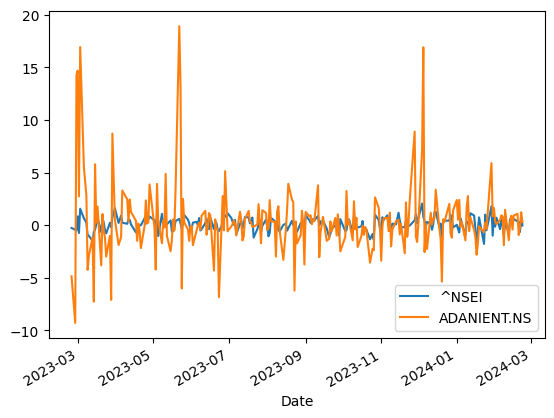

In [109]:
(hist['Return']*100)[['^NSEI', 'ADANIENT.NS']].plot()

<Axes: xlabel='Date'>

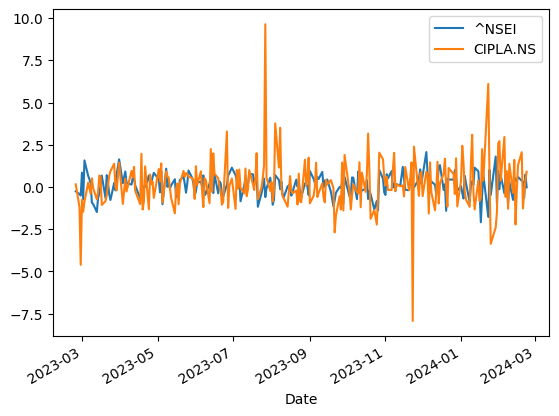

In [115]:
(hist['Return']*100)[['^NSEI', 'CIPLA.NS']].plot()

Is this all theory, or someone is using it?

[1. Moneycontrol](https://www.moneycontrol.com/mutual-funds/nav/hdfc-small-cap-fund-growth/MMS002)
<div>
<img src="moneycontrol-risk-ratios.png" width="500"/>
</div>

[2. Smallcase smart beta](https://www.smallcase.com/blog/quality-smart-beta/)